In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import re
import itertools


In [3]:
base_data = pd.read_csv('../train.csv')
print(base_data.keys())
base_data

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'

### 全ての項目の例を表示

In [4]:
for key in base_data.keys():
    print('key:'+ key)
    print(base_data[key][0:3])
    print()

key:id
0    1
1    2
2    3
Name: id, dtype: int64

key:belongs_to_collection
0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                  NaN
Name: belongs_to_collection, dtype: object

key:budget
0    14000000
1    40000000
2     3300000
Name: budget, dtype: int64

key:genres
0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
Name: genres, dtype: object

key:homepage
0                                  NaN
1                                  NaN
2    http://sonyclassics.com/whiplash/
Name: homepage, dtype: object

key:imdb_id
0    tt2637294
1    tt0368933
2    tt2582802
Name: imdb_id, dtype: object

key:original_language
0    en
1    en
2    en
Name: original_language, dtype: object

key:original_title
0                      Hot Tub Time Machine 2
1    The Princess Diaries 2:

各項目をカテゴリカル変数と連続値に分類

In [5]:
keys_categorical = ['genres', 'homepage', 'original_language', 'production_companies', 'production_countries', 'spoken_languages',\
                                  'status', 'Keywords', 'cast', 'crew']
keys_continuous = ['budget', 'popularity', 'release_date', 'runtime', 'revenue']

クラスを作成して分布を確認

In [6]:
def plot_hist(ipt_data, bins=[], xlabel='x', ylabel='y', fontsize=16):
    
    plt.figure()
    
    if bins==[]: # if bins doexn't defined
        plt.hist(ipt_data)
        
    else:
        plt.hist(ipt_data, bins=bins)

    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.tick_params(labelsize=fontsize)
    plt.grid()
    plt.show()        

In [21]:
class TMDB:
    def __init__(self, base_data):
        self.df = base_data
        self.keys=self.df.keys()
        self.re_str2Dict = re.compile("^[^0][0-9]+$") # Regular Expression for Preproccessing
        self.keys_int = ["id"] # keys its value should be stored as int type
        
    # utils
    def rmvExtChar(self, ipt_str): # Remove Extra Character, which is unnecessary
        return ipt_str.replace("[","").replace("{","").replace("]","").replace("}","").replace("'","").split(',')
    
    
    # "[{'id': 35, 'name': 'Comedy'}]" → {'id':35, 'name':'Comedy'}
    def str2Dict(self, ipt_str_arr):
        return_arr = list()
        for ipt_str in ipt_str_arr:
            if type(ipt_str) == str:
                ipt_str_rmv = self.rmvExtChar(ipt_str) # ipt_str, [['key1:val1'], ['key2:val2']]

                count_list = list() #  Proccessing for duplicate key which can be found in this data.
                
                dict_opt = {}
        
                for d in ipt_str_rmv:
                    if len(d.split(':')) > 1: # some data has only value not with key
                        key = d.split(':')[0].replace(" ", "") # relative to key
                        value = d.split(':')[1].replace(" ", "") # relative to value
                    else:
                        print('*************** key is not found ***************')
                        continue
                        
                    if key not in count_list:
                        # When count is 0
                        if re.search(self.re_str2Dict,value) is not None: # If value is number 
                            dict_opt[key] = float(value)
                        else: # if value is str
                            dict_opt[key] = value


                    else: # key in count_list

                        # When count is 1 (dict key is duplicate)
                        if not type(dict_opt[key]) == list:
                            if re.search(self.re_str2Dict,value) is not None: # If value is number 
                                dict_opt[key] = [dict_opt[key], float(value)]
                            else:# if value is str
                                dict_opt[key] = [dict_opt[key], value]

                        # When count is 2 (dict value is already list)
                        else: 
                            if re.search(self.re_str2Dict,value) is not None: # If value is number 
                                dict_opt[key].append(float(value))
                            else:# if value is str
                                dict_opt[key].append(value)

                    count_list.append(key)
                        
            else: # 
                dict_opt = {}
                        
            # Proccess for int-type value
            for key_i in self.keys_int:
                if key_i in dict_opt.keys():
                    if type(dict_opt[key_i]) is not list:
                        dict_opt[key_i] = int(dict_opt[key_i])
                    else:
                        dict_opt[key_i] = [int(num) for num in dict_opt[key_i]]

            return_arr.append(dict_opt)
                
        return return_arr
    
            


In [53]:
tmdb = TMDB(base_data)
(tmdb.str2Dict(tmdb.df['genres']))

[{'id': 35, 'name': 'Comedy'},
 {'id': [35, 18, 10751, 10749],
  'name': ['Comedy', 'Drama', 'Family', 'Romance']},
 {'id': 18, 'name': 'Drama'},
 {'id': [53, 18], 'name': ['Thriller', 'Drama']},
 {'id': [28, 53], 'name': ['Action', 'Thriller']},
 {'id': [16, 12, 10751], 'name': ['Animation', 'Adventure', 'Family']},
 {'id': [27, 53], 'name': ['Horror', 'Thriller']},
 {'id': 99, 'name': 'Documentary'},
 {'id': [28, 35, 10402, 10751, 12],
  'name': ['Action', 'Comedy', 'Music', 'Family', 'Adventure']},
 {'id': [35, 10402], 'name': ['Comedy', 'Music']},
 {'id': 18, 'name': 'Drama'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 18, 'name': 'Drama'},
 {'id': [35, 80], 'name': ['Comedy', 'Crime']},
 {'id': [28, 53, 878, 9648],
  'name': ['Action', 'Thriller', 'ScienceFiction', 'Mystery']},
 {'id': [28, 80, 18], 'name': ['Action', 'Crime', 'Drama']},
 {'id': [27, 53], 'name': ['Horror', 'Thriller']},
 {'id': [18, 10749], 'name': ['Drama', 'Romance']},
 {'id': [35, 10749], 'name': ['Comedy', 'Roman

### 連続値について分布を確認

budget


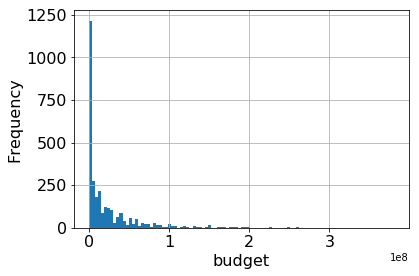

popularity


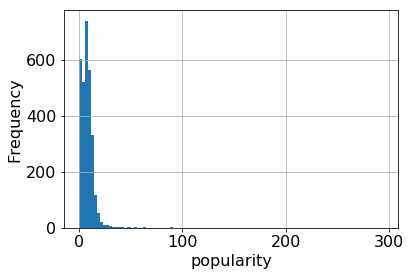

runtime


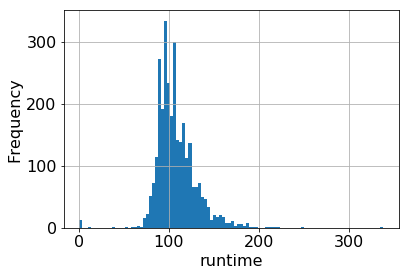

revenue


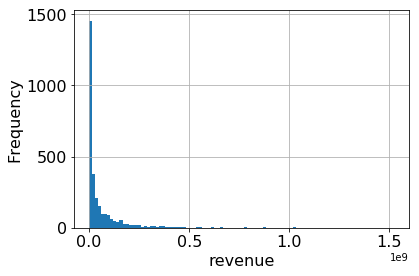

In [40]:
for key in keys_continuous:
    if key == 'release_date': # 日付を時間に直す前処理が必要
        continue
    print(key)
    max_val, min_val = np.max(base_data[key]), np.min(base_data[key])
#     bins = np.arange(min_val, max_val, (max_val - min_val)/100)
    plot_hist((base_data[key][np.isfinite(base_data[key])]), bins=100, xlabel=key, ylabel='Frequency')
    


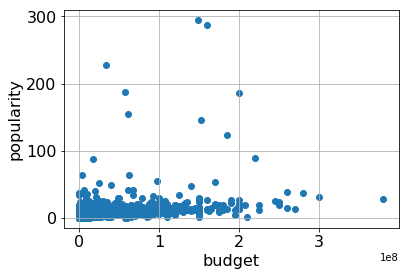

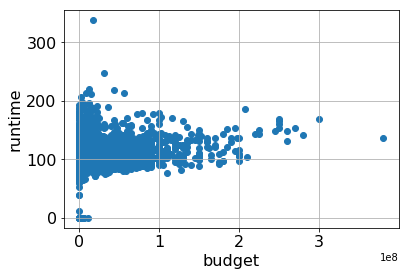

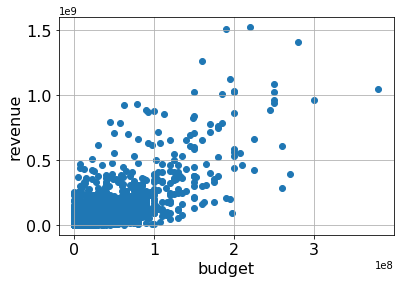

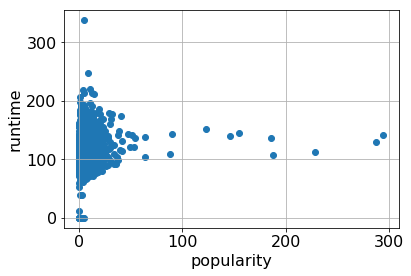

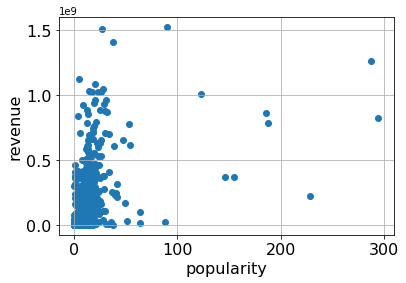

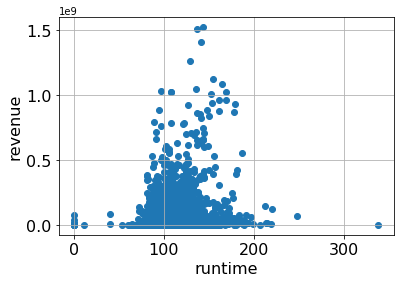

In [47]:
# 連続値の組み合わせの分布
comb_list = list(itertools.combinations(keys_continuous, 2))
for key_arr in comb_list:
    if  'release_date' in key_arr:
        continue
        
    plt.figure()
    plt.scatter(base_data[key_arr[0]], base_data[key_arr[1]])
    plt.xlabel(key_arr[0], fontsize=16)
    plt.ylabel(key_arr[1], fontsize=16)
    plt.grid()
    plt.tick_params(labelsize=16)

    

Python関数テスト用雑コード↓

In [168]:
test_str = base_data['genres'][0]
print(test_str)

test_spl = test_str.replace("[{","").replace("}]","").replace("'","").split(',')
test_temp = {d.split(':')[0].replace(" ", ""): d.split(':')[1].replace(" ", "") for d in test_spl}
for key, value in test_temp.items():
    print(re.search("^[0-9]+$",value))
    if re.search("^[^0][0-9]+$",value) is not None:
        test_temp[key] = float(value)
print(test_spl)
print(test_temp)

print(re.search("^[^0][0-9]+$","0012"))


#a = list(base_data['genres'][0])

[{'id': 35, 'name': 'Comedy'}]
<_sre.SRE_Match object; span=(0, 2), match='35'>
None
['id: 35', ' name: Comedy']
{'id': 35.0, 'name': 'Comedy'}
None


In [332]:
# list(np.asarray([0.1, 0.6, 1.7, 2.11], dtype='int')
test_list = [1,2]
print((test_list).append(4))


None


/Users/yossy/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """


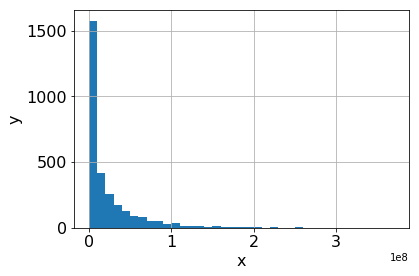

In [60]:
bins = np.arange(np.min(base_data['budget']), np.max(base_data['budget']), 10000000)
plot_hist(base_data['budget'], bins=bins)

/Users/yossy/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """


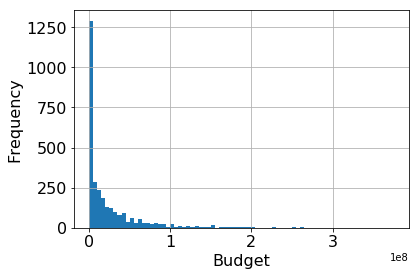

/Users/yossy/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


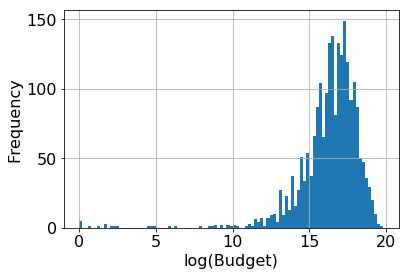

/Users/yossy/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


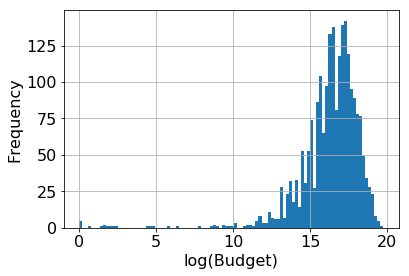

In [73]:
plot_hist((base_data['budget']), np.arange(np.min(base_data['budget']),np.max(base_data['budget']), 5e6 ), \
         xlabel='Budget', ylabel='Frequency')
plot_hist((np.log(base_data['budget']))[~(base_data['budget']==0)], np.arange(0, 20, 0.2), xlabel='log(Budget)', ylabel='Frequency')

plot_hist((np.log(base_data['budget']))[~(base_data['budget']==0)], bins=100, xlabel='log(Budget)', ylabel='Frequency')

### とりあえず全部分布出す

In [74]:
base_data.keys()

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [ ]:
plot_hist((np.log(base_data['budget']))[~(base_data['budget']==0)], bins=100, xlabel='log(Budget)', ylabel='Frequency')



In [29]:
np.log(bins)

/Users/yossy/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([       -inf, 16.11809565, 16.81124283, 17.21670794, 17.50439001,
       17.72753356, 17.90985512, 18.0640058 , 18.19753719, 18.31532023,
       18.42068074, 18.51599092, 18.6030023 , 18.68304501, 18.75715298,
       18.82614585, 18.89068437, 18.951309  , 19.00846741, 19.06253463,
       19.11382792, 19.16261809, 19.2091381 , 19.25358987, 19.29614948,
       19.33697148, 19.37619219, 19.41393252, 19.45030016, 19.48539148,
       19.51929303, 19.55208286, 19.58383155, 19.61460321, 19.64445618,
       19.67344371, 19.70161459, 19.72901356])

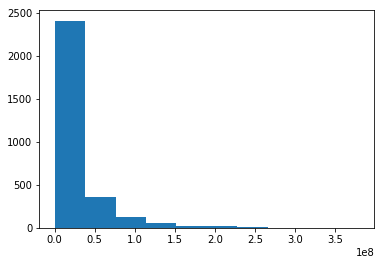

In [42]:
plt.figure
plt.hist(base_data['budget'])
plt.show()        